In [30]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#adding some non-newtonian potential
sim = rebound.Simulation()
E = -0.337
X = 0.70004
v = 1.
R_c = 0.14
q = 0.9

def calcVy(x, E, R_c):
    return np.sqrt(2*E - np.log(x*x + R_c*R_c ))

sim.add(m=0, x=X, y=0, vx=0, vy=calcVy(X, E, R_c))

def af(simp):
    r = np.sqrt(simp.contents.particles[0].x**2 + simp.contents.particles[0].y**2+ simp.contents.particles[0].z**2)
    simp.contents.particles[0].ax = -(v**2 * simp.contents.particles[0].x)/((simp.contents.particles[0].y**2/(q**2)) + R_c**2 + simp.contents.particles[0].x**2)
    simp.contents.particles[0].ay = -(v**2 * simp.contents.particles[0].y)/((q**2)*(R_c**2 + simp.contents.particles[0].x**2.)+ simp.contents.particles[0].y**2)        
    simp.contents.particles[0].az = 0
    
sim.additional_forces = af


In [31]:
def bisect(sim,t1,t2):
    tm = (t1+t2)/2.
    if t2-t1<(5.0e-7):
        return tm
    sim.integrate(tm)
    if sim.particles[0].y>0.:
        t2 = tm
        return bisect(sim,t1,t2)
    else:
        t1 = tm
        return bisect(sim,t1,t2)

In [32]:
Ncross = 1000
y_p = -1.
t_p = -1.
data = np.zeros((Ncross,2,3))
data_xyz = np.zeros((0,3))
crossings = 0
while (crossings < Ncross):
    sim.step()
    if (sim.particles[0].y > 0 and y_p < 0):
        tm = bisect(sim, t_p, sim.t)
        #print "tm = {t}".format(t=tm)
        data[crossings,0] = sim.particles[0].xyz
        data[crossings,1] = sim.particles[0].vxyz
        sim.integrate(tm+0.1)
        crossings += 1
    y_p = sim.particles[0].y
    t_p = sim.t
    data_xyz = np.append(data_xyz,[sim.particles[0].xyz], axis=0)

In [33]:
#print data_xyz

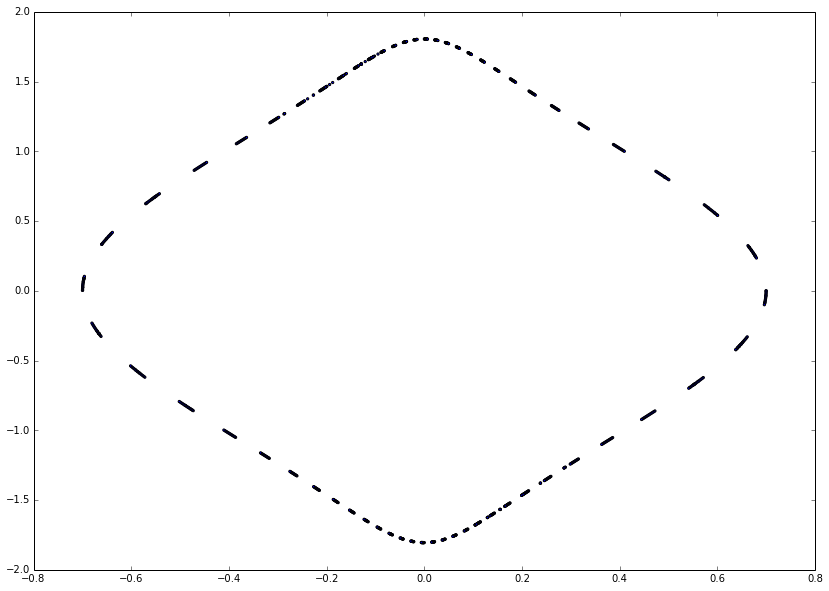

In [34]:
fig = plt.figure(figsize=(14, 10))
ax= plt.subplot(111)
ax.scatter(data[:,0,0], data[:,1,0], marker=".")

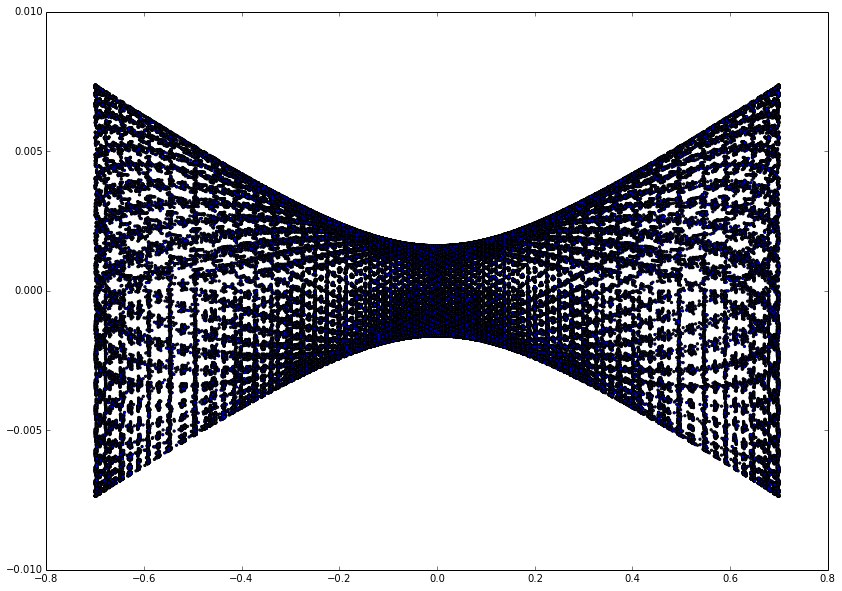

In [35]:
fig = plt.figure(figsize=(14, 10))
ax= plt.subplot(111)
ax.scatter(data_xyz[:,0], data_xyz[:,1], marker=".")